## Import module and data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

working_dir = os.getcwd()
still_df = pd.read_csv(working_dir + '/still.csv')
moving_df = pd.read_csv(working_dir + '/moving.csv')

## stantionary data

In [2]:
still_df

%time  field.header.seq   field.header.stamp  \
0    1613076093277472500                 1  1613076093276715040   
1    1613076094279963930                 2  1613076094279719114   
2    1613076095280584197                 3  1613076095280100107   
3    1613076096278718990                 4  1613076096278271913   
4    1613076097281103363                 5  1613076097280632972   
..                   ...               ...                  ...   
617  1613076710250253699               618  1613076710250061988   
618  1613076711250944044               619  1613076711250683069   
619  1613076712250376719               620  1613076712250082015   
620  1613076713250617808               621  1613076713249799966   
621  1613076714251836488               622  1613076714250631093   

     field.header.frame_id  field.latitude  field.longitude  field.altitude  \
0                      NaN       42.338882       -71.085075            13.2   
1                      NaN       42.338882       -71.085075            13.2   
2                      NaN       42.338882       -71.085075            13.2   
3                      NaN       42.338882       -71.085075            13.2   
4                      NaN       42.338882       -71.085075            13.2   
..                     ...             ...              ...             ...   
617                    NaN       42.338886       -71.085068            11.7   
618                    NaN       42.338886       -71.085068            11.7   
619                    NaN       42.338886       -71.085068            11.7   
620                    NaN       42.338886       -71.085068            11.7   
621                    NaN       42.338886       -71.085068            11.7   

     field.utm_easting  field.utm_northing  field.zone field.letter  
0         328234.96875           4689508.5          19            T  
1         328234.96875           4689508.5          19            T  
2         328234.96875           4689508.5          19            T  
3         328234.96875           4689508.5          19            T  
4         328234.96875           4689508.5          19            T  
..                 ...                 ...         ...          ...  
617       328235.12500           4689509.0          19            T  
618       328235.12500           4689509.0          19            T  
619       328235.12500           4689509.0          19            T  
620       328235.12500           4689509.0          19            T  
621       328235.12500           4689509.0          19            T  

[622 rows x 11 columns]

## Extract stationary data

In [3]:
x1 = list(still_df['field.utm_easting'])
y1 = list(still_df['field.utm_northing'])
z1 = list(still_df['field.altitude'])
t1 = list(still_df.index)
temp = np.zeros(len(still_df.index))

## Plot location data

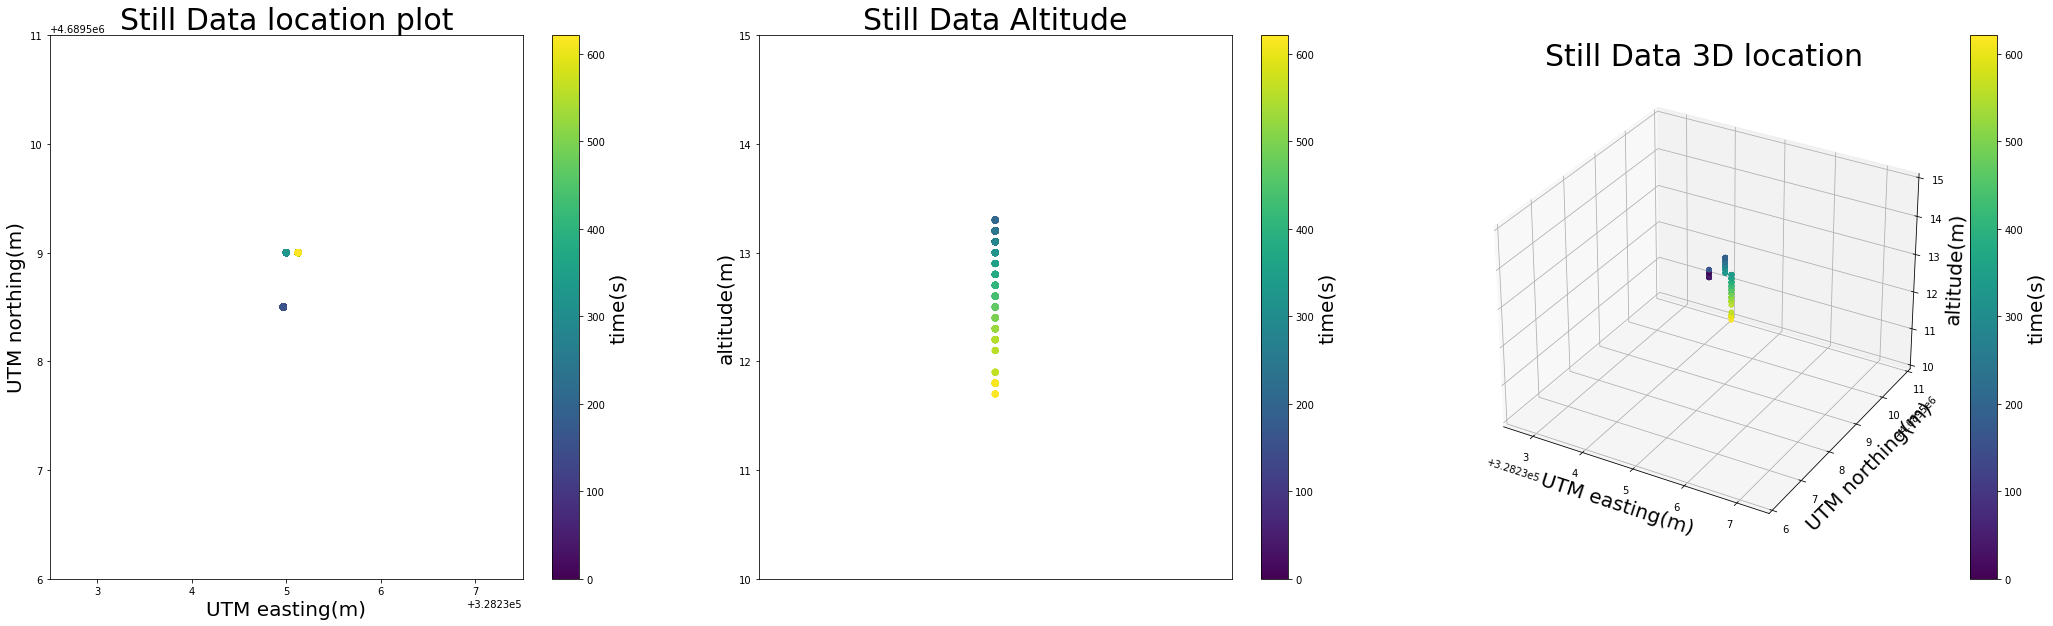

In [4]:
fig = plt.figure(1, figsize = (36,10))
ax = fig.add_subplot(131)
im = ax.scatter(x1,y1, c=t1, cmap='viridis')
ax.set_xlim(328232.5,328237.5)
ax.set_ylim(4689506, 4689511)
ax.set_title('Still Data location plot', fontsize = 30)
ax.set_xlabel('UTM easting(m)', fontsize = 20)
ax.set_ylabel('UTM northing(m)', fontsize = 20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)

ax = fig.add_subplot(132)
im = ax.scatter(temp, z1, c=t1, cmap='viridis')
ax.set_ylim(10,15)
ax.set_title('Still Data Altitude', fontsize = 30)
ax.set_ylabel('altitude(m)', fontsize = 20)
ax.axes.xaxis.set_visible(False)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)

ax = fig.add_subplot(133, projection = '3d')
im = ax.scatter(x1, y1, z1, c=t1, cmap='viridis')
ax.set_xlim(328232.5,328237.5)
ax.set_ylim(4689506, 4689511)
ax.set_zlim(10,15)
ax.set_title('Still Data 3D location', fontsize = 30)
ax.set_xlabel('UTM easting(m)', fontsize = 20)
ax.set_ylabel('UTM northing(m)', fontsize = 20)
ax.set_zlabel('altitude(m)', fontsize = 20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)
plt.show()

## Plot location data distribution

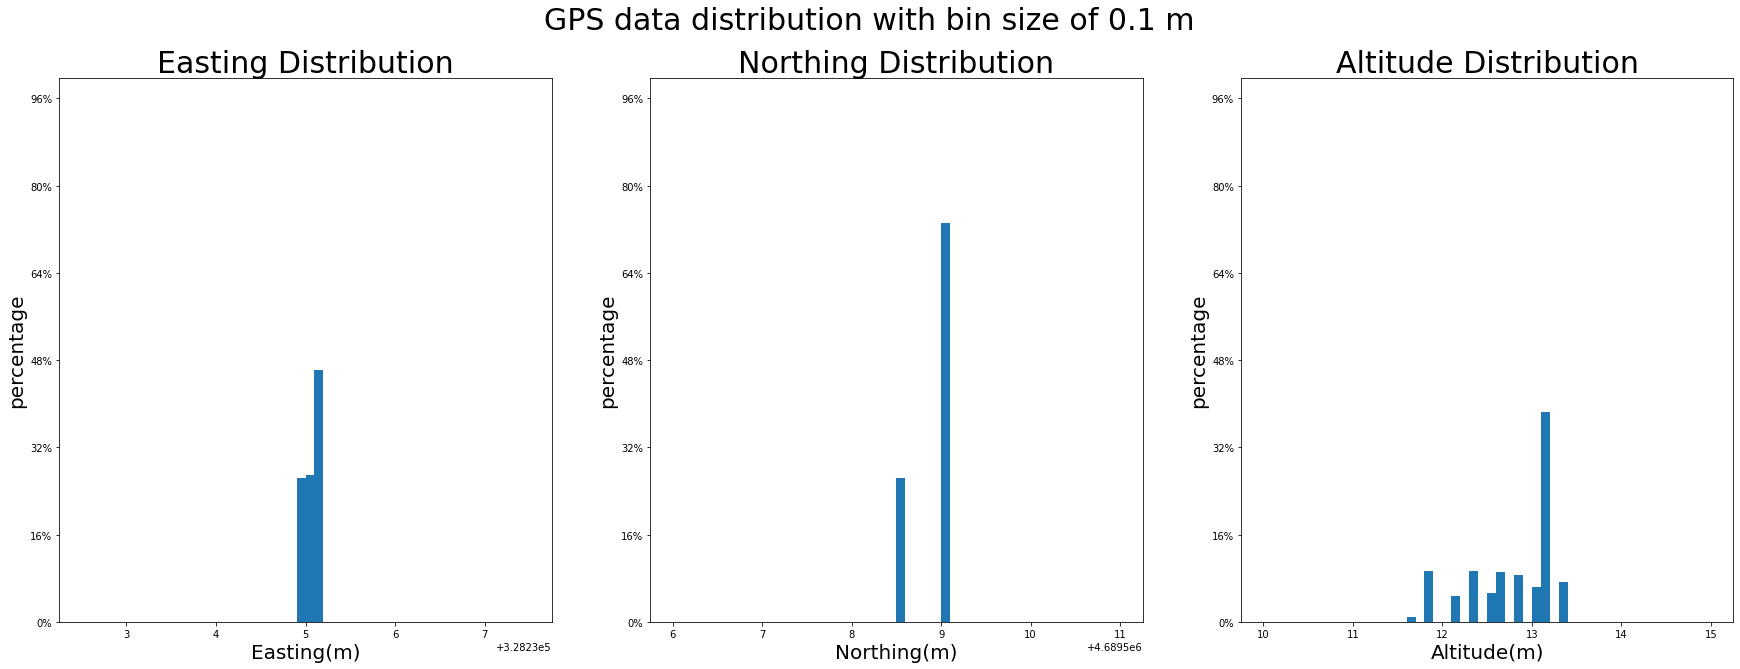

In [5]:
from matplotlib.ticker import PercentFormatter
bin_size = 0.1
nbin = round(5/bin_size)

fig = plt.figure(3, figsize = (30,10))
fig.suptitle('GPS data distribution with bin size of {} m'.format(bin_size), fontsize = 30)

ax = fig.add_subplot(131)

ax.set_title('Easting Distribution', fontsize = 30)
ax.set_xlabel('Easting(m)', fontsize = 20)
ax.hist(x1, bins=nbin, range=(328232.5,328237.5))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

ax = fig.add_subplot(132)
ax.set_title('Northing Distribution', fontsize = 30)
ax.set_xlabel('Northing(m)', fontsize = 20)
ax.hist(y1, bins=nbin, range=(4689506, 4689511))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

ax = fig.add_subplot(133)
ax.set_title('Altitude Distribution', fontsize = 30)
ax.set_xlabel('Altitude(m)', fontsize = 20)
ax.hist(z1, bins=nbin, range=(10,15))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

plt.show()

## Plot error distribution

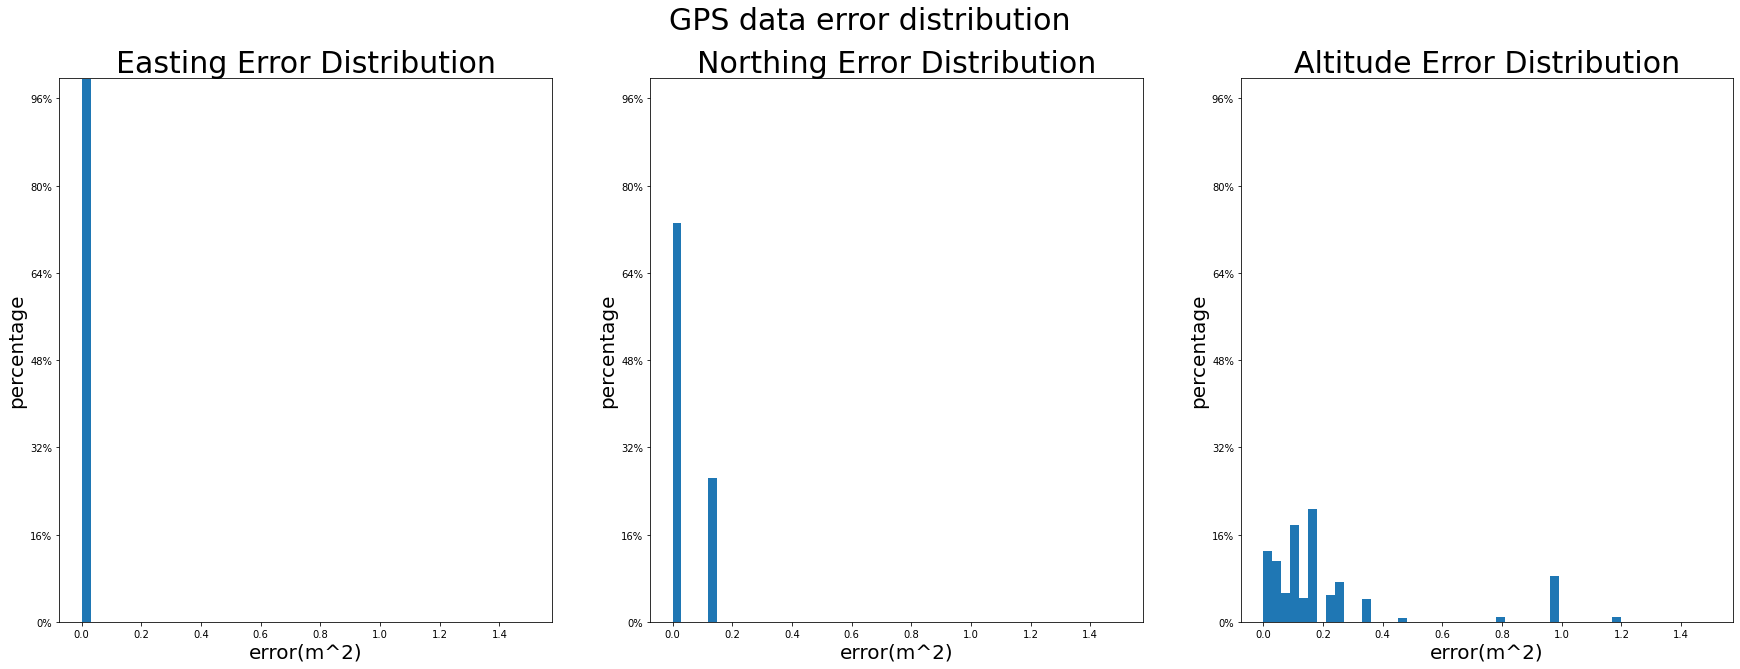

In [6]:
from matplotlib.ticker import PercentFormatter

nbin = 50

fig = plt.figure(4, figsize = (30,10))
fig.suptitle('GPS data error distribution'.format(bin_size), fontsize = 30)

ax = fig.add_subplot(131)

x1e = (np.array(x1)-np.mean(x1))**2
ax.set_title('Easting Error Distribution', fontsize = 30)
ax.set_xlabel('error(m^2)', fontsize = 20)
ax.hist(x1e, nbin, range=(0,1.5))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

y1e = (np.array(y1)-np.mean(y1))**2
ax = fig.add_subplot(132)
ax.set_title('Northing Error Distribution', fontsize = 30)
ax.set_xlabel('error(m^2)', fontsize = 20)
ax.hist(y1e, nbin, range=(0,1.5))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

z1e = (np.array(z1)-np.mean(z1))**2
ax = fig.add_subplot(133)
ax.set_title('Altitude Error Distribution', fontsize = 30)
ax.set_xlabel('error(m^2)', fontsize = 20)
ax.hist(z1e, nbin, range=(0,1.5))
ax.set_ylim(0,len(still_df.index)+1)
ax.set_ylabel('percentage', fontsize = 20)
ax.yaxis.set_major_formatter(PercentFormatter(len(still_df.index)))

plt.show()

## Moving data

In [7]:
moving_df

%time  field.header.seq   field.header.stamp  \
0    1613150580253361798               117  1613150580252950906   
1    1613150581257500169               118  1613150581253802061   
2    1613150582792857093               119  1613150582791212081   
3    1613150583252886436               120  1613150583251929998   
4    1613150584253577302               121  1613150584251921892   
..                   ...               ...                  ...   
185  1613150765267799256               302  1613150765265546083   
186  1613150766266902294               303  1613150766265172958   
187  1613150767251195761               304  1613150767249733924   
188  1613150768248159811               305  1613150768247829914   
189  1613150769265986904               306  1613150769265618085   

     field.header.frame_id  field.latitude  field.longitude  field.altitude  \
0                      NaN       42.340347       -71.088577       11.900000   
1                      NaN       42.340343       -71.088577       11.200000   
2                      NaN       42.340343       -71.088585       11.000000   
3                      NaN       42.340343       -71.088585       10.800000   
4                      NaN       42.340343       -71.088593       10.400000   
..                     ...             ...              ...             ...   
185                    NaN       42.339233       -71.091415       16.500000   
186                    NaN       42.339233       -71.091415       16.900000   
187                    NaN       42.339233       -71.091415       16.799999   
188                    NaN       42.339233       -71.091415       16.799999   
189                    NaN       42.339233       -71.091415       16.799999   

     field.utm_easting  field.utm_northing  field.zone field.letter  
0         327950.37500           4689678.5          19            T  
1         327949.93750           4689678.0          19            T  
2         327949.81250           4689678.0          19            T  
3         327949.40625           4689678.0          19            T  
4         327948.84375           4689677.5          19            T  
..                 ...                 ...         ...          ...  
185       327713.62500           4689560.5          19            T  
186       327713.37500           4689560.5          19            T  
187       327713.37500           4689560.5          19            T  
188       327713.37500           4689560.5          19            T  
189       327713.37500           4689560.5          19            T  

[190 rows x 11 columns]

## Extract moving data

In [8]:
x2 = list(moving_df['field.utm_easting'])
y2 = list(moving_df['field.utm_northing'])
z2 = list(moving_df['field.altitude'])
t2 = list(moving_df.index)
lat2 = list(moving_df['field.latitude'])
lon2 = list(moving_df['field.longitude'])
temp = np.zeros(len(moving_df.index))

## Plot moving data location

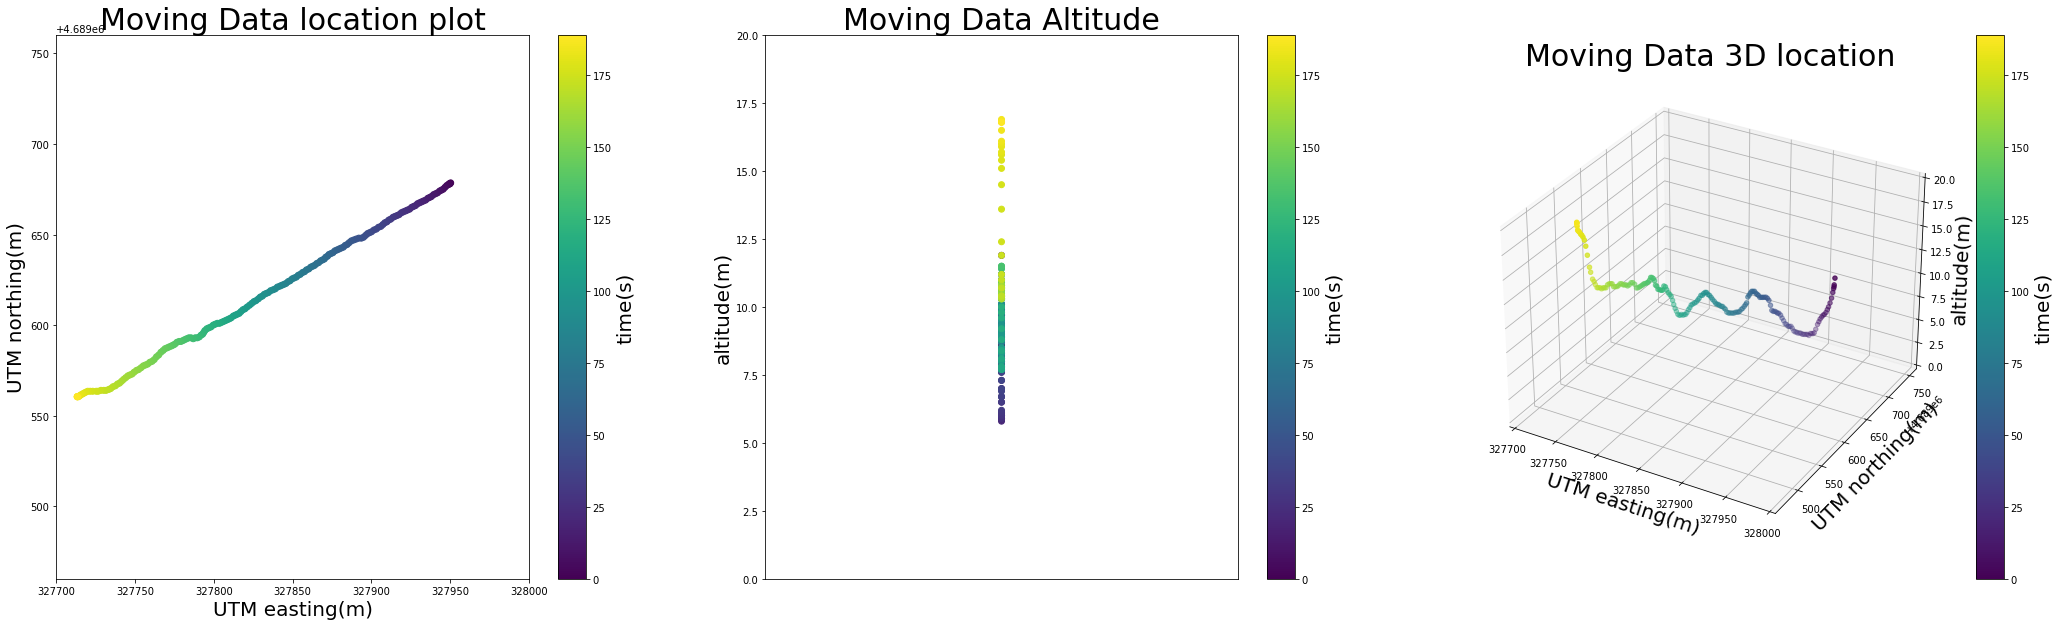

In [9]:
fig = plt.figure(4, figsize = (36,10))
ax = fig.add_subplot(131)
im = ax.scatter(x2,y2, c=t2, cmap='viridis')
ax.set_xlim(327700, 328000)
ax.set_ylim(4689460, 4689760)
ax.set_title('Moving Data location plot', fontsize = 30)
ax.set_xlabel('UTM easting(m)', fontsize = 20)
ax.set_ylabel('UTM northing(m)', fontsize = 20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)

ax = fig.add_subplot(132)
im = ax.scatter(temp, z2, c=t2, cmap='viridis')
ax.set_ylim(0,20)
ax.set_title('Moving Data Altitude', fontsize = 30)
ax.set_ylabel('altitude(m)', fontsize = 20)
ax.axes.xaxis.set_visible(False)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)

ax = fig.add_subplot(133, projection = '3d')
im = ax.scatter(x2, y2, z2, c=t2, cmap='viridis')
ax.set_xlim(327700, 328000)
ax.set_ylim(4689460, 4689760)
ax.set_zlim(0,20)
ax.set_title('Moving Data 3D location', fontsize = 30)
ax.set_xlabel('UTM easting(m)', fontsize = 20)
ax.set_ylabel('UTM northing(m)', fontsize = 20)
ax.set_zlabel('altitude(m)', fontsize = 20)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('time(s)', fontsize = 20)
plt.show()

## Plot moving data on the map

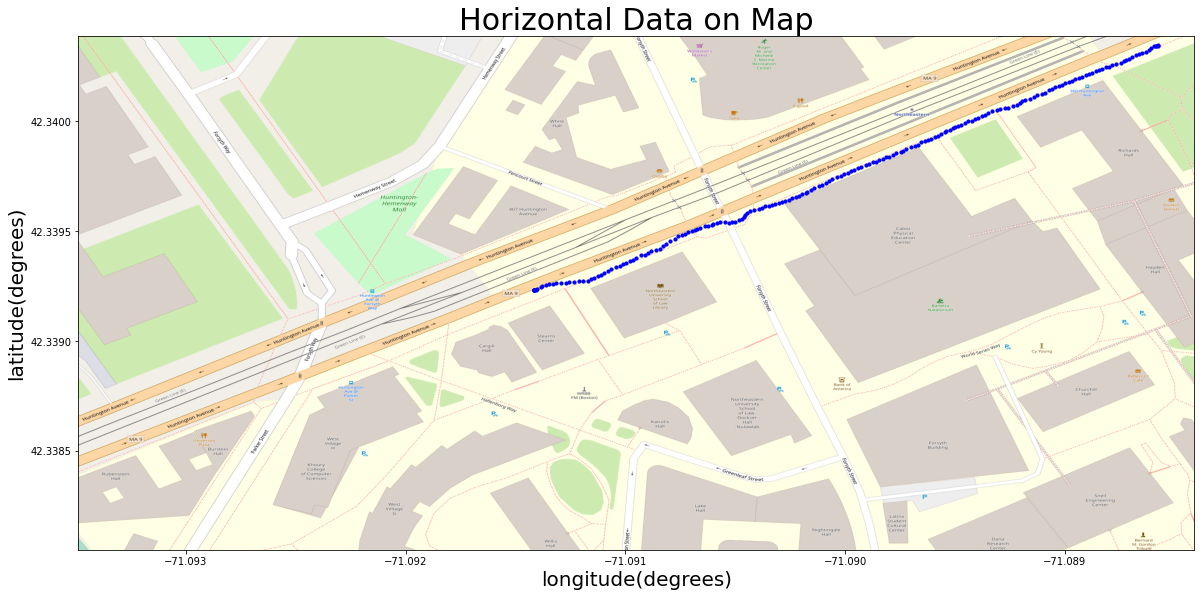

In [10]:
# The map is obtained from openstreetmap.org
map_img = plt.imread(working_dir + '/map.png')
# obtained with the map
BBox = (-71.09349, -71.08841,42.33805, 42.34039)
fig = plt.figure(5, figsize=(20,20))
ax = fig.add_subplot(111)
ax.scatter(lon2, lat2, zorder=1, c='b', s=10)

ax.set_title('Horizontal Data on Map', fontsize = 30)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.set_xlabel('longitude(degrees)', fontsize = 20)
ax.set_ylabel('latitude(degrees)', fontsize = 20)
ax.imshow(map_img, zorder=0, extent = BBox, aspect= 'equal')